Номер 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse

In [2]:
def common_way(A, U, V):
    return np.linalg.inv(A + U @ V)

In [3]:
def woodbury(A, U, V): 
    A_inv = np.diag(1. / np.diag(A))
    return A_inv - A_inv @ U @ np.linalg.inv(np.eye(k) + V @ A_inv @ U) @ V @ A_inv

In [4]:
k = 100 
p = 5000
A = np.random.uniform(1, 10) * np.eye(p)  
U = np.random.rand(p, k) 
V = np.random.rand(k, p)

In [5]:
%%time 
Common = common_way(A, U, V)

CPU times: user 10.8 s, sys: 631 ms, total: 11.5 s
Wall time: 3.03 s


In [6]:
%%time 
Woodburry = woodbury(A, U, V)

CPU times: user 7.1 s, sys: 457 ms, total: 7.56 s
Wall time: 1.91 s


In [7]:
np.allclose(Common, Woodburry)

True

Номер 3

In [8]:
exapmle_2a = np.array([[3, 0], [0, -2]])
exapmle_2b = np.array([[0, 2], [0, 0], [0, 0]])
exapmle_2c = np.array([[1, 1], [1, 1]])

In [9]:
def graphs(matrix):
    u, s, vh = np.linalg.svd(matrix)
    
    vh = vh[:2, :2]
    u = u[:2, :2]
    
    v1 = vh[:,0]
    v2 = vh[:,1]
    t = np.linspace(0, 2*np.pi, 100)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title('Правые Сингулярные вектора')
    ax.plot(np.cos(t), np.sin(t),color='black') 
    ax.arrow(0, 0, *v1, width=0.02, length_includes_head=True, color='r')
    ax.arrow(0, 0, *v2, width=0.02, length_includes_head=True, color='b')
    plt.show()
    
    
    el = matrix @ [np.cos(t), np.sin(t)]
    u1 = u[:,0]
    u2 = u[:,1]
    u1 = s[0]*u1
    u2 = s[1]*u2
    
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title('Левые Сингулярные вектора')
    ax.plot(el[0,:], el[1,:],color='black')
    ax.arrow(0, 0, *u1, width=0.02*el.max(), length_includes_head=True, color='r')
    ax.arrow(0, 0, *u2, width=0.02*el.max(), length_includes_head=True, color='b')
    ax.set_xlim(-el.max(), el.max())
    ax.set_ylim(-el.max(), el.max())
    plt.show()

Матрица 2а


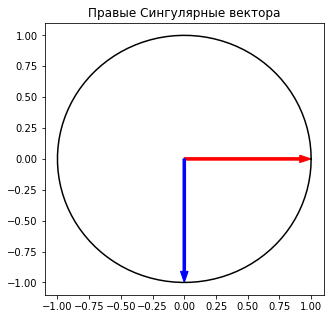

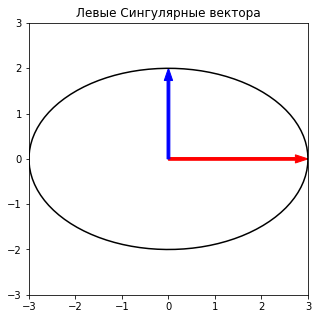

Матрица 2b


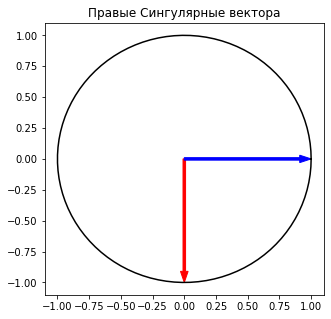

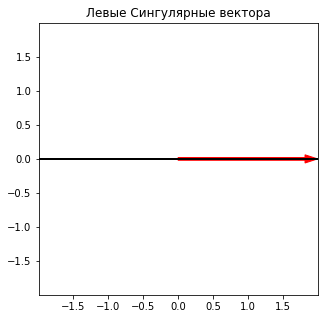

Матрица 2c


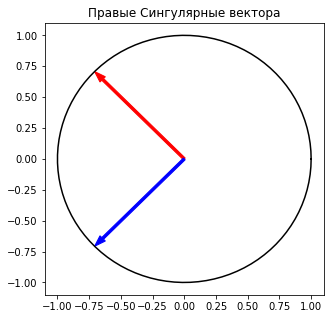

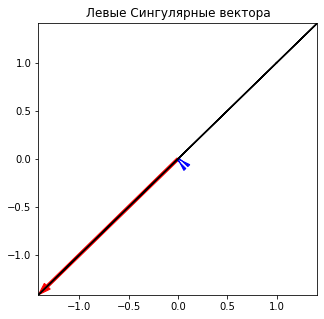

In [10]:
A = np.array([[3,0],
              [0,-2]])

B = np.array([[0, 2],
              [0, 0],
              [0, 0]])

C = np.array([[1,1],
              [1,1]])

print('Матрица 2а')
graphs(A)
print('Матрица 2b')
graphs(B)
print('Матрица 2c')
graphs(C)

Задание 7

In [11]:
data = np.genfromtxt('signatureData.csv', dtype=float, delimiter=',')

In [12]:
x1 = []
y1 = []
x2 = []
y2 = []
first_avg = []
second_avg = []
for i in range(len(data)):
    x1.append(data[i][0])
    y1.append(data[i][1])
    x2.append(data[i][2])
    y2.append(data[i][3])

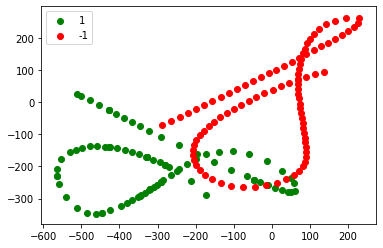

In [13]:
plt.scatter(x1, y1, c='g', label='1')
plt.scatter(x2, y2, c='r', label='-1')
plt.legend(loc='upper left')
plt.show()

In [14]:
first_avg.append(sum(x1) / len(x1)) 
first_avg.append(sum(y1) / len(y1)) 
second_avg.append(sum(x2) / len(x2)) 
second_avg.append(sum(y2) / len(y2)) 
x1_temp = x1 - first_avg[0]
y1_temp = y1 - first_avg[1]
x2_temp = x2 - second_avg[0]
y2_temp = y2 - second_avg[1]
first_matrix_temp = np.column_stack((x1_temp, y1_temp))
second_matrix_temp = np.column_stack((x2_temp, y2_temp))

In [15]:
u, s, vh = np.linalg.svd(np.dot(first_matrix_temp.transpose(),second_matrix_temp), full_matrices=True)
R = np.dot(u,vh)
b1 = np.column_stack((x1, y1))
mu = second_avg - np.dot(R.transpose(),first_avg)
b_temp =np.dot(b1,R) + mu

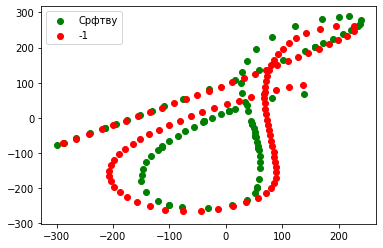

In [16]:
plt.scatter(b_temp[:, 0], b_temp[:, 1], c='g', label='Срфтву')
plt.scatter(x2, y2, c='r', label='-1')
plt.legend(loc='upper left')
plt.show()

Номер 6

In [17]:
with np.load ('data_distance_svd.npz') as data :
    xp , yp , zp = data ['xp'] , data ['yp'] , data ['zp']

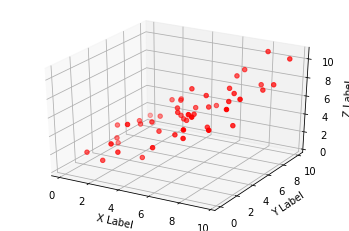

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xp, yp, zp, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
X = np.array([xp, yp, zp]).T
N = X.shape[0]
x_mean, y_mean, z_mean = np.mean(X, axis=0)
X_centr = X - np.array([x_mean, y_mean, z_mean])
U, S, V = np.linalg.svd(X_centr)
norm = V @ [0, 0, 1]
c = (1 / N) * X @ np.array([[1], [1], [1]])

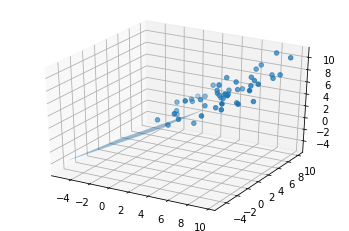

In [20]:
xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))

z = (-norm[0] * xx - norm[1] * yy) * 1. / norm[2]
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z, alpha=0.5)
ax = plt.gca()

ax.scatter(xp, yp, zp)
plt.show()